## Problem Statment

### Parameters:

1. **Material Composition (M):** The percentatge of high strength fibres. 
    - Range: 0% to 100%
2. **Thickness (T):** Diameter of Rope in milimeters.
    - Range: 10mm to 50mm
3. **Length (L):** Length of Rope in meters.
    - Range: 10m to 100m
4. **Twist Factor (F):** Number of twists in the rope.
    - Range: 5 to 20 twists per meter

### Objective Function:

$Strength (S) = (M * 0.8) + (T * 1.5) + (L * 0.2) + (F*0.5)$

### Constraints:

- $M \geq 20$
- $T \leq 40$
- $L \geq 20$
- $F \geq 10$

## Genetic Algorithm

In [295]:
import random

In [296]:
def fitness(individual):
    M, T, L, F = individual
    if M < 20 or T > 40 or L < 20 or F < 10:
        return 0
    fitness_value = M*0.8 + T*1.5 + L*0.2 + F*0.5
    return fitness_value

In [297]:
def create_population(size):
    population = []
    for _ in range(size):
        M = random.randint(0, 100)
        T = random.randint(10, 50)
        L = random.randint(10, 100)
        F = random.randint(5, 20)
        population.append((M, T, L, F))
    return population

In [298]:
def crossover(parent1, parent2):
    point = random.randint(1, 3)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

In [299]:
def mutate(individual, mutation_rate=0.1):
    M, T, L, F = individual
    if random.random() < mutation_rate:
        M = random.randint(0, 100)
        T = random.randint(10, 50)
        L = random.randint(10, 100)
        F = random.randint(5, 20)
    return (M, T, L, F)

In [300]:
Y = []
X = []
def genetic_algorithm(pop_size=20, generations=10):
    population = create_population(pop_size)
    for _ in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        best_fitness = fitness(population[0])
        Y.append(best_fitness)
        X.append(_)
        next_gen = population[:2]
        while len(next_gen) < pop_size:
            p1, p2 = random.choices(population[:10], k=2)
            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1)
            c2 = mutate(c2)
            next_gen += [c1, c2]
        population = next_gen
    return max(population, key=fitness)

In [301]:
best_rope = genetic_algorithm(pop_size=10, generations=50)
print("Best rope configuration:", best_rope)
print(f"M: {best_rope[0]}, T: {best_rope[1]}, L: {best_rope[2]}, F: {best_rope[3]}")
print("Best rope fitness:", fitness(best_rope))

Best rope configuration: (93, 40, 98, 18)
M: 93, T: 40, L: 98, F: 18
Best rope fitness: 163.0


### Printing Fitness over Generations

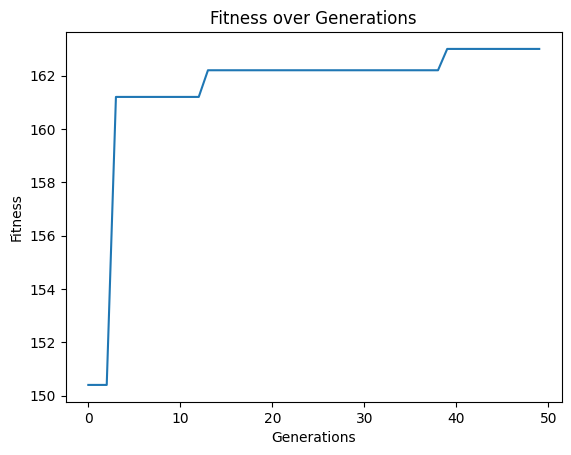

In [302]:
import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Fitness over Generations')
plt.show()